# Helmholtz 1D - Bootstrap on a Fixed Domain Size

## Goal
Given the Helhmholtz operator $A = -\Delta + k^2 I$, find **test functions** $x$ of unit $l_2$ norm with small $\|A x\|$; i.e., near-null-space components, on a periodic domain, with constant $k$.

To this end, we generate test functions that approximately solve $A x = \lambda x$, where $\lambda$ is the minimum eigenvalue.

## Discretization
We use the 3-point finite difference $A^h = [1, -2 + (kh)^2, 1]$. In this experiment we use a fixed periodic domain with $n=16$ points and a small $kh=0.5$. The final grid on the large domain will have a much smaller $kh$ to yield a good discretization, but as we coarsen it $kh$ increases, so this simulates the level where we already see waves (2 coarse variables per aggregate).

In [1]:
import logging
import numpy as np
import helmholtz as hm
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sys
from numpy.ma.testutils import assert_array_almost_equal
from numpy.linalg import eig, norm

%load_ext autoreload
%autoreload 2

np.set_printoptions(linewidth=500, precision=2, suppress=False)
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format="%(levelname)-8s %(message)s",
                    datefmt="%a, %d %b %Y %H:%M:%S")

## 1-Level

### Exact Eigenpairs
There are 3 positive eigenvalues, corresponding to the constant, left wave and right wave. $\lambda_1$ happens to be a double eigenvalue. We will be attempting to find it and its corresponding eigenvectors $v_1, v_2$ (or combinations of them). 

In [2]:
def exact_eigenpair(a):
    """Returns the exact eigenpairs (v, lam) ((v[:, i], lam[i]) is the ith pair), sorted by
    ascending|lam| value."""
    lam, v = eig(a.toarray())
    lam = np.real(lam)
    ind = np.argsort(np.abs(lam))
    lam = lam[ind]
    return v[:, ind], lam

In [3]:
n = 16
kh = 0.5
a = hm.linalg.helmholtz_1d_operator(kh, n)
print("A in some window")
print(a.toarray()[:5,:5])

A in some window
[[-1.75  1.    0.    0.    0.  ]
 [ 1.   -1.75  1.    0.    0.  ]
 [ 0.    1.   -1.75  1.    0.  ]
 [ 0.    0.    1.   -1.75  1.  ]
 [ 0.    0.    0.    1.   -1.75]]


In [4]:
v, lam = exact_eigenpair(a)
pd.DataFrame(lam)

,0
0,0.097759
1,0.097759
2,0.250000
3,-0.335786
4,-0.335786
5,-0.984633
6,-0.984633
7,-1.750000
8,-1.750000
9,-2.515367


In [5]:
for i in range(3):
    plt.plot(v[:, i], label="$\lambda_{} = {:.4f}$".format(i, lam[i]))
plt.legend();
plt.grid(True);

DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG    findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEB

DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Thin.otf) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 6.698636363636363
DEBUG    findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Regula

DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-RegularItalic.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(<Font 'System Font' (SFNSText.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Semibold.otf) normal normal 600 normal>) = 10.24
DEBUG    findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) 

DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Ultralight.otf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.725
DEBUG    findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Chalkb

DEBUG    findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Ultralight.otf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-LightItalic.otf) italic normal 300 normal>) = 11.145
DEBUG    findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Apple SD Gothic Neo' (A

DEBUG    findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 4

DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-UltralightItalic.otf) italic normal 100 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Thin.otf) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.6299999999999

DEBUG    findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Light.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'A

DEBUG    findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG2.otf) normal normal 740 normal>) = 10.373
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(

DEBUG    findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 10.15
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 10.434999999999999
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 11.

DEBUG    findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 11.344999999999999
DEBUG    findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 11.525
DEBUG    findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Menlo' (Menlo.ttc) norma

DEBUG    findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 11.43
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Regular.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Semibold.otf) normal normal 600 normal>) = 11.24
DEBUG    findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG4.otf) normal normal 740 normal>) = 11.373
DEBUG    findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Krungthep' (Krungt

DEBUG    findfont: score(<Font 'PCSB Hebrew' (PCSB Hebrew.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Myanmar Sangam MN' (Myanmar Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BlackItalic.otf) italic normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 n

DEBUG    findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.05
DEBUG    findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.05
DEBUG    findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400

DEBUG    findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Regular.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal 900 normal>) = 10.24
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal 700 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal 700 no

DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-RegularItalic.otf) italic normal 400 normal>) = 11.335
DEBUG    findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.145
DEBUG    findfont: score(<Font 'System Font' (SFNSText.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Semibold.otf) normal normal 600 normal>) = 10.145
DEBUG    findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.24
DEBUG    findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 1

DEBUG    findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.44
DEBUG    findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.43
DEBUG    findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Bold.otf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino 

DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-LightItalic.otf) italic normal 300 normal>) = 11.43
DEBUG    findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal 400 condensed>) = 10.535
DEBUG    findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal 700 normal>) = 10.

DEBUG    findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font 'Myanmar MN' (My

DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Thin.otf) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999
DEBUG    findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG    findfon

DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Light.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG    findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 250 normal>) = 10.1925
DEBUG    findfont: score(<Fo

DEBUG    findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG2.otf) normal normal 740 normal>) = 10.373
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-RegularItalic.otf) italic normal 400 normal>) = 11.05
D

DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 10.15
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 10.434999999999999
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-SemiboldItalic.otf) italic normal 600 normal>) = 10.24
DEBUG    findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score

DEBUG    findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 11.525
DEBUG    findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Menlo' (Menlo.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Bold.otf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>

DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Regular.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Semibold.otf) normal normal 600 normal>) = 11.24
DEBUG    findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG4.otf) normal normal 740 normal>) = 11.373
DEBUG    findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Bold.otf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Heavy.otf) normal normal 900 normal>) = 11.525
DEBUG    findfont: score(<Font

DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BlackItalic.otf) italic normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Black.otf) normal normal 900 normal>) = 11.525
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompa

DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 1.05
DEBUG    findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf

DEBUG    findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Regular.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal 900 normal>) = 10.24
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal 700 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal

DEBUG    findfont: score(<Font 'System Font' (SFNSText.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Semibold.otf) normal normal 600 normal>) = 10.145
DEBUG    findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.24
DEBUG    findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Light.otf) normal norma

DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.44
DEBUG    findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.43
DEBUG    findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Bold.otf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 100 normal>) = 10.62
DEBUG    findfont: score(<Font '.Arabic UI Text' (ArabicUIText.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Fo

DEBUG    findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal 400 condensed>) = 10.535
DEBUG    findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'PT Mono' (PTMono.ttc) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'Devanagari Sangam MN' (Devanagari Sangam MN.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.otf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'Bodo

DEBUG    findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font 'Myanmar MN' (Myanmar MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Verdana' (Verdana.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Shree Devanagari 714' (Shree714.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Rounded' (SFNSRound

DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999
DEBUG    findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Thin.otf) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Charter' (Charter.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Tamil

DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 0.33499999999999996
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG    findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 250 normal>) = 10.1925
DEBUG    findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal 600 condensed>) = 10.44
DEBUG    findfont: sco

DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-RegularItalic.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Black.otf) normal normal 900 normal>) = 10.525
DEBUG    fi

DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-SemiboldItalic.otf) italic normal 600 normal>) = 11.24
DEBUG    findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Muna' (Muna.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf)

DEBUG    findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Menlo' (Menlo.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG3.otf) normal normal 740 normal>) = 10.373
DEBUG    findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.otf) normal normal 400 normal

DEBUG    findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG4.otf) normal normal 740 normal>) = 10.373
DEBUG    findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Heavy.otf) normal normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Waseem' (Waseem.ttc) nor

DEBUG    findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Black.otf) normal normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Black.otf) normal normal 900 normal>) = 10.525


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal 600 condensed>) = 10.44
DEBUG    findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Courier New' (Courier New Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kohinoor Telugu' (KohinoorTelugu.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text

DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Black.otf) normal normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Thin.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Semibold.otf) normal normal 600 normal>) = 10.24
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '

DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Bangla Sangam MN' (Bangla Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Semibold.otf) normal normal 600 normal>) = 10.24
DEBUG    findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Light.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: sc

DEBUG    findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-HeavyItalic.otf) italic normal 800 normal>) = 11.43
DEBUG    findfont: score(<Font 'Herculanum' (Herculanum.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Big Caslon' (BigCaslon.ttf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Skia' (Skia.ttf) normal normal 5 normal>) = 10.42525
DEBUG    findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Corsiva Hebrew' (Corsiva.ttc) normal normal 400 nor

DEBUG    findfont: score(<Font 'Waseem' (Waseem.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Lao MN' (Lao MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 10.44
DEBUG    findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 norm

DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 condensed>) = 11.535
DEBUG    findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10

DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findf

DEBUG    findfont: score(<Font 'Gurmukhi MT' (Gurmukhi.ttf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-MediumItalic.otf) italic normal 500 normal>) = 11.145
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal 500 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal 800 condensed>) = 10.629999999999999
DEBUG    findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-HeavyItalic.otf) italic normal 800 normal>) = 11.43
DEBUG    findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfon

DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'Oriya MN' (Oriya MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-LightItalic.otf) italic normal 300 normal>) = 11.145
DEBUG    findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Medium.otf) normal normal 600 condensed>) = 10.44
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Damascus' (Damascus.ttc) normal nor

DEBUG    findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Times' (Times.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.Helvetica Neue DeskInterface' (HelveticaNeueDeskInterface.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Fon

DEBUG    findfont: score(<Font '.Keyboard' (Keyboard.ttf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535
DEBUG    findfont: Matching cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/Users/olivne/.conda/envs/hm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000.
DEBUG    findfont: Matching cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'cmtt10' (cm

DEBUG    findfont: score(<Font 'Farah' (Farah.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG1.otf) normal normal 740 normal>) = 10.373
DEBUG    findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-MediumItalic.otf) italic normal 500 normal>) = 11.145
DEBUG    findfont: score(<Font 'System Font' (SFNSTextItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Thin.otf) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 n

DEBUG    findfont: score(<Font 'Verdana' (Verdana Bold Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Papyrus' (Papyrus.ttc) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'Arial Black' (Arial Black.ttf) normal normal 900 normal>) = 10.525
DEBUG    findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-RegularItalic.otf) italic normal

DEBUG    findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kohinoor Telugu' (KohinoorTelugu.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Heavy.otf) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(<Font 'ITF Devanagari' (ITFDevanagari.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Ultralight.otf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 4

DEBUG    findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Luminari' (Luminari.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Ultralight.otf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-LightItalic.otf) italic normal 300 normal>) = 11.145
DEBUG    findfont: score(<Font 'Microsoft Sans Serif' (Mic

DEBUG    findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Light.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinItalic.otf) italic normal 200 normal>) = 11.24
DEBUG    findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>

DEBUG    findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Corsiva Hebrew' (Corsiva.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-UltralightItalic.otf) italic normal 100 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Thin.otf) 

DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 10.44
DEBUG    findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Light.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Fon

DEBUG    findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-

DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 0.05
DEBUG    findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono

DEBUG    findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-HeavyItalic.otf) italic normal 800 normal>) = 11.43
DEBUG    findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Sinhala Sangam

DEBUG    findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Medium.otf) normal normal 600 condensed>) = 10.44
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 10.43
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Semibol

DEBUG    findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'PCSB Hebrew' (PCSB Hebrew.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Myanmar Sangam MN' (Myanmar Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BlackItalic.otf) italic normal 900 normal>) = 11.525
DEBUG    findfont: score(<Font 'Bodoni 72 Oldstyle'

DEBUG    findfont: Matching cmex10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG  

DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Thin.otf) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-Regular.otf) norm

DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-RegularItalic.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(<Font 'System Font' (SFNSText.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Semibold.otf) normal normal 600 normal>) = 10.24
DEBUG    findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) 

DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Ultralight.otf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.725
DEBUG    findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Chalkb

DEBUG    findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Ultralight.otf) normal normal 100 normal>) = 10.335
DEBUG    findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-LightItalic.otf) italic normal 300 normal>) = 11.145
DEBUG    findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Apple SD Gothic Neo' (A

DEBUG    findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG    findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 4

DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-UltralightItalic.otf) italic normal 100 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25
DEBUG    findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Thin.otf) normal normal 200 normal>) = 10.24
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.6299999999999

DEBUG    findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Light.otf) normal normal 300 normal>) = 10.145
DEBUG    findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'A

DEBUG    findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-ThinG2.otf) normal normal 740 normal>) = 10.373
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-BoldItalic.otf) italic normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) normal normal 800 normal>) = 10.43
DEBUG    findfont: score(

DEBUG    findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 10.15
DEBUG    findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 0.43499999999999994
DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 11

DEBUG    findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 11.344999999999999
DEBUG    findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 11.525
DEBUG    findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Menlo' (Menlo.ttc) norma

DEBUG    findfont: score(<Font 'Lao MN' (Lao MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 10.335
DEBUG    findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Bold.otf) normal normal 700 normal>) = 11.335
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 11.44
DEBUG    findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 normal>) = 11.145
DEBUG    findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 D

DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 200 normal>) = 11.24
DEBUG    findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 condensed>) = 10.535
DEBUG    findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal 300 normal>) = 11.145
DEBUG    findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 11.145
DEBUG    findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 11.05
DEBUG    findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 10.05
DEBUG    findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 11

DEBUG    findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.335
DEBUG    findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.05
DEBUG    findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.05
DEBUG    findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.335
DEBUG    f

DEBUG    findfont: score(<Font 'Gurmukhi MT' (Gurmukhi.ttf) normal normal 500 normal>) = 10.24
DEBUG    findfont: score(<Font '.SF Compact Text' (SFCompactText-MediumItalic.otf) italic normal 500 normal>) = 11.24
DEBUG    findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal 500 condensed>) = 10.44
DEBUG    findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal 800 condensed>) = 10.344999999999999
DEBUG    findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'System Font' (SFNSDisplay-HeavyItalic.otf) italic normal 800 normal>) = 11.145
DEBUG    findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Medium.otf) normal normal 500 normal>) = 10.24
DEBUG    findfont: score(<Fo

DEBUG    findfont: score(<Font 'PT Serif Caption' (PTSerifCaption.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.535
DEBUG    findfont: score(<Font 'Oriya MN' (Oriya MN.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.335
DEBUG    findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal 400 normal>) = 10.335


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 1-Level Method
To generate $K$ examples (i.e., a test matrix $x_{n \times K}$), the 1-level method is the iteration
* $\nu$ Kaczmarz relaxation sweeps on $A x - \lambda x = 0$ with fixed $\lambda$.
* Update $x \longleftarrow x_k / (x_k^T x_k)^{\frac12}$ for all $k$, $\lambda \longleftarrow mean_k((x_k^T A x_k)/(x_k^T x_k))$, where $x_k$ is the $k$th column of $x$.

### Asymptotic Convergence
We start from $x \longleftarrow rand[-1,1], \lambda \longleftarrow 0$ and perform 1-level iterations.

In [11]:
n = 16
kh = 0.5
a = hm.linalg.helmholtz_1d_operator(kh, n)
level = hm.multilevel.Level.create_finest_level(a)
multilevel = hm.multilevel.Multilevel()
multilevel.level.append(level)

In [12]:
# Run enough Kaczmarz relaxations per lambda update (not just 1 relaxation) so we converge to the minimal one.
num_iters = 10

logger = logging.getLogger("multilevel")
logger.setLevel(logging.DEBUG)

for nu in (1, 5, 10, 100):
    x = hm.multilevel.random_test_matrix((n,), num_examples=10)
    level.global_params.lam = 0
    print("nu {}".format(nu))
    method = lambda x: multilevel.relax_cycle(x, None, None, 1, relax_coarsest=nu)
    x, conv_factor = hm.multilevel.relax_test_matrix(level.operator, level.rq, method, x, num_iters, print_frequency=1)

nu 1
DEBUG        0 |r| 1.59549620e-01 rq -1.75024
DEBUG        1 |r| 2.72374311e-01 (1.70714) rq -1.08521 (0.66503)
DEBUG        2 |r| 1.60713566e-01 (0.59005) rq -0.98678 (0.14802)
DEBUG        3 |r| 8.87768483e-02 (0.55239) rq -0.96730 (0.19786)
DEBUG        4 |r| 5.23954896e-02 (0.59019) rq -0.97437 (0.36265)
DEBUG        5 |r| 3.00128377e-02 (0.57281) rq -0.97770 (0.47247)
DEBUG        6 |r| 2.13578057e-02 (0.71162) rq -0.98088 (0.95135)
DEBUG        7 |r| 1.27881132e-02 (0.59876) rq -0.98211 (0.38860)
DEBUG        8 |r| 8.88683835e-03 (0.69493) rq -0.98326 (0.92714)
DEBUG        9 |r| 6.52055966e-03 (0.73373) rq -0.98391 (0.57198)
DEBUG       10 |r| 4.69363053e-03 (0.71982) rq -0.98425 (0.52381)
nu 5
DEBUG        0 |r| 1.48043831e-01 rq -1.80499
DEBUG        1 |r| 7.83877561e-02 (0.52949) rq -0.03059 (1.77441)
DEBUG        2 |r| 6.11727711e-02 (0.78039) rq -0.02872 (0.00105)
DEBUG        3 |r| 5.53967321e-02 (0.90558) rq -0.01823 (5.62693)
DEBUG        4 |r| 5.26291514e-02 (0.950

It turns out that $\nu$ must be sufficiently large ($100$) to guarantee convergence to the smallest eigenvalue, and even then it depends on the initial guess. This is perhaps because Kaczmarz is a slow relaxation, but more likely because a random initial guess is not good enough. 

Perhaps that's OK; for bootstrapping, we need the initial vectors to be smooth enough, but not necessarily the exact lowest eigenvector.

### Relaxed Test Functions
Now, employ a reasonable number of Kacmzarz sweeps per iteration, and iterations.

In [13]:
num_sweeps = 10
nu = 5

# Generate relaxed test matrix.
level = hm.multilevel.Level.create_finest_level(a)
x = hm.multilevel.random_test_matrix((n,))
b = np.zeros_like(x)
method = lambda x: multilevel.relax_cycle(x, None, None, 1, relax_coarsest=nu)
x, _ = hm.multilevel.relax_test_matrix(level.operator, level.rq, method, x, num_sweeps=num_sweeps)

DEBUG        0 |r| 4.01999328e-02 rq -1.37602
DEBUG        1 |r| 9.68774973e-02 (2.40989) rq -0.10227 (1.27376)
DEBUG        2 |r| 9.11847663e-02 (0.94124) rq -0.12517 (0.01798)
DEBUG        3 |r| 9.12535584e-02 (1.00075) rq -0.12423 (0.04128)
DEBUG        4 |r| 8.95424930e-02 (0.98125) rq -0.11256 (12.33760)
DEBUG        5 |r| 8.79055244e-02 (0.98172) rq -0.09296 (1.68023)
DEBUG        6 |r| 8.58638444e-02 (0.97677) rq -0.06446 (1.45420)
DEBUG        7 |r| 8.29352738e-02 (0.96589) rq -0.02695 (1.31610)
DEBUG        8 |r| 7.90289405e-02 (0.95290) rq 0.01743 (1.18330)
DEBUG        9 |r| 7.44826680e-02 (0.94247) rq 0.06411 (1.05152)
DEBUG       10 |r| 6.99007010e-02 (0.93848) rq 0.10738 (0.92725)


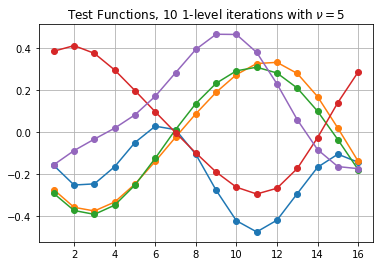

In [15]:
gridpoint = np.arange(1, n+1)
for i in range(5):
    plt.plot(gridpoint, x[:, i], '-o')
plt.grid(True);
plt.title("Test Functions, {} 1-level iterations with $\\nu={}$".format(num_iters, nu));
#plt.savefig("/Users/olivne/Desktop/test_functions.png")

In [16]:
print("Theoretical #points per period {:.2f}".format(2*np.pi/kh))

Theoretical #points per period 12.57


## Coarsening

### Restriction: SVD on Window (Aggregate)
Let $w=4$ be the size of the window. We find $K = 4 w$ relaxed vectors and calculate the SVD of $x[w,:]$. The rows of the restriction $R$ are the principal components that guarantee $10\%$ reconstruction error. 

In [17]:
# Generate coarse variables (R) based on a window of x.
aggregate_size = 4
x_aggregate_t = x[:aggregate_size].transpose()
r, s = hm.restriction.create_restriction(x_aggregate_t, 0.1)

In [18]:
r.asarray()

array([[ 0.44,  0.54,  0.55,  0.47],
       [ 0.68,  0.25, -0.23, -0.65]])

In [19]:
print("Singular values {}".format(s))
print("%unexplained energy / interpolation error {:.3f}".format(
    (sum(s[2:]**2)/sum(s**2))**0.5))

Singular values [3.41 1.54 0.27 0.03]
%unexplained energy / interpolation error 0.072


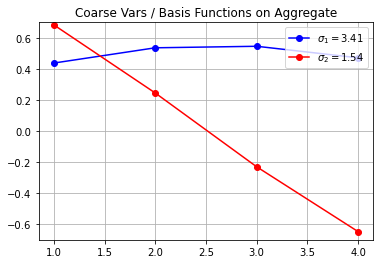

In [20]:
colors = ["b", "r"]
rr = r.asarray()
for i, color in enumerate(colors):
    plt.plot(np.arange(1, aggregate_size + 1), rr[i], '{}o-'.format(color[i  % len(color)]), label="$\sigma_{" + str(i+1) + "} = " + "{:.2f}".format(s[i]) + "$")
plt.ylim([-0.7, 0.7]);
plt.legend(loc="upper right");
plt.grid(True);
plt.title("Coarse Vars / Basis Functions on Aggregate");

<!-- ### Identifying Neighborhoods Algebraically -->

In [21]:
# print("Test Matrix dimension: ", x.shape)

In [22]:
# xt = x.transpose()
# d = sklearn.metrics.pairwise.cosine_similarity(x, x)
# print("(x, x) cos similarity")
# print(d)

For this small $kh$ value, we see that the nearest neighbors are indeed gometric neighbors.

## 2-Level Convergence
Define a bootstrap cycle:
* Relax at the finest level (or perform iterations with the current cycle) on $A x = \lambda  B x$ with $B = I$.
* Construct coarse level: $R$ by SVD and tiling over the entire domain; $P = R^T$; $A^c = R A P$; $B^c = R B P$.

We run two bootstrap cycles.

This gives us a multilevel hierarchy, for which we define an FAS cycle for $A x = \lambda x$. We define $\sigma^0 \equiv 1$ (a vector of size $K$) and $\eta^l(x^l) = (x^l)^T B x^l$.
. At level $l$, it consists of the steps
* If $l = N_{levels}-1$ (coarsest),
  * Repeat $30$ times:
    * Run $5$ Kaczmarz relaxation sweeps on $A x^l - \lambda x^l = b^l$ with fixed $\lambda$.
    * Update $x \longleftarrow x^l_k (\sigma^l_k / \eta^l(x^l))^{\frac12}$ for all $k$, $\lambda \longleftarrow mean_k(((x^l_k)^T (A^l x^l_k - b^l_k))/((x^l_k)^T B^l x^l_k))$, where $x^l_k$ is the $k$th column of $x^l$.
* Else:
  * Relax $\nu_1$ times $A x^l - \lambda B x^l = b^l$.
  * Set $x^{l+1} \longleftarrow R^{l+1} x^l$. Save $x^{l+1}_{INIT} \longleftarrow x^{l+1}$.
  * Set $b^{l+1} \longleftarrow R^{l+1} (b^l - A^l x^l) + A^{l+1} x^{l+1}$.
  * Set $\sigma^{l+1} \longleftarrow \sigma^l - \eta^l(x^l) + \eta^{l+1} x^{l+1}$.
  * Perform $\gamma$ cycles at level $l+1$.
  * Correct $x^l \longleftarrow x^l + P(x^{l+1} - x^{l+1}_{INIT})$.
  * Relax $\nu_2$ times $A x^l - \lambda B x^l = b^l$.
  
Note how we keep a single $\lambda$ value for all test functions and update it to the mean Rayleigh quotient at the coarsest level.

### Example where things go well

In [23]:
np.random.seed(0)
x, multilevel = hm.bootstrap.generate_test_matrix(a, 0, num_examples=8, num_bootstrap_steps=2)
assert len(multilevel) == 2

# FMG start so (x, lambda) has a reasonable initial guess.
level = multilevel.level[0]
x_init = hm.bootstrap.fmg(multilevel, num_cycles_finest=0)

# Check that (3,3) is at least as fast as (3,2). Print conv factor vs. nu1, nu2.
# x, lam = exact_eigenpair(multilevel.level[0].a)
# x = x[:, None]
# multilevel.level[0].global_params.lam = lam

INFO     Smallest domain size 16, bootstrap with 2 levels
INFO     Bootstrap step 1/2
INFO     Relax at level 0
DEBUG        0 |r| 2.24984631e-01 rq -2.24869
DEBUG        1 |r| 9.95735154e-02 (0.44258) rq -0.18450 (2.06418)
DEBUG        2 |r| 6.35658256e-02 (0.63838) rq -0.12729 (0.02772)
DEBUG        3 |r| 5.93875730e-02 (0.93427) rq -0.10377 (0.41111)
DEBUG        4 |r| 5.77404041e-02 (0.97226) rq -0.08118 (0.96045)
DEBUG        5 |r| 5.60453917e-02 (0.97064) rq -0.05621 (1.10536)
DEBUG        6 |r| 5.32752653e-02 (0.95057) rq -0.02917 (1.08275)
DEBUG        7 |r| 4.92178672e-02 (0.92384) rq -0.00173 (1.01517)
DEBUG        8 |r| 4.40458167e-02 (0.89492) rq 0.02397 (0.93605)
DEBUG        9 |r| 3.81383349e-02 (0.86588) rq 0.04597 (0.85645)
DEBUG       10 |r| 3.19918685e-02 (0.83884) rq 0.06322 (0.78375)
INFO     lambda 0.07341871151593471
INFO     Coarsening level 0->1
DEBUG    Singular vals [1.54 0.61 0.09 0.01], nc 2 interpolation error 0.052
INFO     Relax at level 1
DEBUG        0 

In [24]:
print("R on aggregate")
print(multilevel.level[1].r.asarray())
print("A^c")
print(multilevel.level[1].a.toarray())

R on aggregate
[[-0.53 -0.56 -0.51 -0.38]
 [-0.61 -0.17  0.29  0.71]]
A^c
[[-0.19 -0.11  0.2   0.23  0.    0.    0.2  -0.38]
 [-0.11 -1.22 -0.38 -0.44  0.    0.    0.23 -0.44]
 [ 0.2  -0.38 -0.19 -0.11  0.2   0.23  0.    0.  ]
 [ 0.23 -0.44 -0.11 -1.22 -0.38 -0.44  0.    0.  ]
 [ 0.    0.    0.2  -0.38 -0.19 -0.11  0.2   0.23]
 [ 0.    0.    0.23 -0.44 -0.11 -1.22 -0.38 -0.44]
 [ 0.2   0.23  0.    0.    0.2  -0.38 -0.19 -0.11]
 [-0.38 -0.44  0.    0.    0.23 -0.44 -0.11 -1.22]]


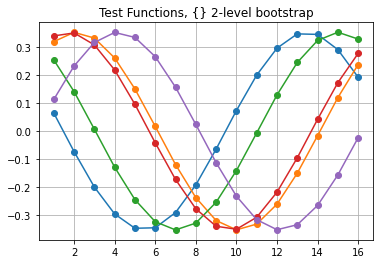

In [25]:
gridpoint = np.arange(1, n+1)
for i in range(5):
    plt.plot(gridpoint, x[:, i], '-o')
plt.grid(True);
plt.title("Test Functions, {} 2-level bootstrap");
#plt.savefig("/Users/olivne/Desktop/test_functions.png")

### Stationarity Test
Starting from exact solution, the cycle doesn't change the residuals, whether the relaxations are applied before or after the coarse-level correction during the cycle.

In [26]:
# Stationarity test of Cycle(0, 2).
x = v[:, :1]
multilevel.level[0].global_params.lam = lam[0]
multilevel.relax_cycle(x, 0, 2, 30, update_lam="coarsest", debug=True);

# Stationarity test of Cycle(2, 0).
x = v[:, :1]
multilevel.level[0].global_params.lam = lam[0]
multilevel.relax_cycle(x, 2, 0, 30, update_lam="coarsest", debug=True);

DEBUG    --------------------------------------------------------------------------------
DEBUG    Level    Operation          |R|           |R_norm|      lambda    
DEBUG    0        initial            5.7371e-16    0.0000e+00    0.09775907
DEBUG    1        initial            4.4928e-16    0.0000e+00    0.09775907
DEBUG    1        coarsest (30)      3.1281e-17    2.2204e-16    0.09775907
DEBUG    0        correction 0       3.5336e-16    2.2204e-16    0.09775907
DEBUG    0        relax 2            1.0200e-16    0.0000e+00    0.09775907
DEBUG    --------------------------------------------------------------------------------
DEBUG    Level    Operation          |R|           |R_norm|      lambda    
DEBUG    0        initial            3.5819e-16    2.2204e-16    0.09775907
DEBUG    0        relax 2            1.1741e-16    0.0000e+00    0.09775907
DEBUG    1        initial            1.0723e-16    0.0000e+00    0.09775907
DEBUG    1        coarsest (30)      6.0426e-17    1.1102e-1

### Asymptotic Convergence vs. $\nu_1 + \nu_2$
We test both $Cycle(0,\nu)$ and $Cycle(\nu,0)$ for $\nu=1,\dots,8$. We expect that
* The asymptotic convergence of both cycles is the same.
* The convergence improves with $\nu$, up to a point (bounded by the interpolation/coarse-level correction accuracy).

In [27]:
logger = logging.getLogger("multilevel")
logger.setLevel(logging.INFO)

def two_level_conv_factor(nu1, nu2):
    logger.debug("nu1 {} nu2 {}".format(nu1, nu2))
    relax_cycle = lambda x: multilevel.relax_cycle(x, nu1, nu2, 10, update_lam="coarsest")
    x = x_init.copy()
    x, conv_factor = hm.multilevel.relax_test_matrix(
        level.operator, level.rq, relax_cycle, x, 10,
        residual_stop_value=1e-11, lam_stop_value=1e-20)
    return conv_factor


conv_factor = pd.DataFrame([
    [two_level_conv_factor(nu1, nu2) for nu2 in range(6)]
    for nu1 in range(6)])

Two-level convergence factor (measured over the last 5 cycles) vs. $\nu_1$ (down), $\nu_2$ (across):

In [28]:
conv_factor

,0,1,2,3,4,5
0,1.000000,0.486409,0.311367,0.388732,0.288462,0.233796
1,0.439378,0.315011,0.409524,0.370380,0.338014,0.324218
2,0.327383,0.410182,0.369318,0.337836,0.324206,0.304168
3,0.409833,0.370840,0.336556,0.324180,0.304161,0.285133
4,0.370347,0.337560,0.324108,0.304171,0.285136,0.268163
5,0.338198,0.324227,0.304207,0.285138,0.268166,0.250895


The convergence factor depends only on $\nu_1+\nu_2$ and improves with $\nu_1+\nu_2$, up to $0.2$. For an interpolation error of $\varepsilon$, if a fine-operator eigenvector's eigenvalue is $\lambda$ and the corresponding coarse-operator eigenvalue os $lam^c$, we can expect a coarse-level correction error $\approx 1 - (1-\varepsilon)^2 (\lambda^c/\lambda)$. The experimental result is close to this rule-of-thumb estimation.

In [29]:
lam1 = eig(multilevel.level[1].a.toarray())[0]
lam1 = lam1[np.argsort(np.abs(lam1))]
print("Fine lam (smallest 8)", lam[:8])
print("Coarse lam           ", lam1)
print("Ratio                ", lam1 / lam[:8])

Fine lam (smallest 8) [ 0.1   0.1   0.25 -0.34 -0.34 -0.98 -0.98 -1.75]
Coarse lam            [ 0.1   0.1   0.24 -0.34 -0.6  -1.51 -1.51 -2.12]
Ratio                 [1.   1.   0.95 1.03 1.79 1.54 1.54 1.21]


In [30]:
print("Rule of thumb lower bound for coarse level operator's convergence of smooth components {:.2f}".format(1 - (1 - 0.095)**2 * 1.03))

Rule of thumb lower bound for coarse level operator's convergence of smooth components 0.16


### Case of Random Start that Leads to Bad Multilevel Hierarchy
Problem: the quality of the multilevel hierarchy (2-level convergence factors) depends on the random start of the bootstrap process. Here's an example where things go badly.

In [31]:
np.random.seed(1)
x, multilevel = hm.bootstrap.generate_test_matrix(a, 0, num_examples=8, num_bootstrap_steps=2)
assert len(multilevel) == 2

# FMG start so (x, lambda) has a reasonable initial guess.
level = multilevel.level[0]
x_init = hm.bootstrap.fmg(multilevel, num_cycles_finest=0)

# Check that (3,3) is at least as fast as (3,2). Print conv factor vs. nu1, nu2.
# x, lam = exact_eigenpair(multilevel.level[0].a)
# x = x[:, None]
# multilevel.level[0].global_params.lam = lam

INFO     Smallest domain size 16, bootstrap with 2 levels
INFO     Bootstrap step 1/2
INFO     Relax at level 0
INFO     lambda -0.31917509927168974
INFO     Coarsening level 0->1
DEBUG    Singular vals [1.13 0.91 0.05 0.  ], nc 2 interpolation error 0.037
INFO     Relax at level 1
INFO     lambda -0.31917509927168974
INFO     Bootstrap step 2/2
INFO     Cycle at level 0
INFO     lambda -0.3357864366442618
INFO     Coarsening level 0->1
DEBUG    Singular vals [1.03e+00 9.71e-01 1.82e-07 1.76e-10], nc 2 interpolation error 0.000
INFO     Relax at level 1
INFO     lambda -0.3357864366442618
DEBUG    FMG level 1 init |r| 3.25091825e-01 lam 0.00000
DEBUG    FMG level 1 cycles 1 |r| 1.49306020e-01 lam -0.07718
DEBUG    FMG level 0 init |r| 1.49306020e-01 lam -0.07718
DEBUG    FMG level 0 cycles 0 |r| 1.49306020e-01 lam -0.07718


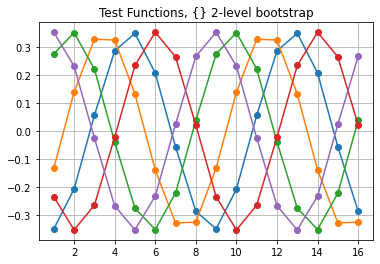

In [32]:
gridpoint = np.arange(1, n+1)
for i in range(5):
    plt.plot(gridpoint, x[:, i], '-o')
plt.grid(True);
plt.title("Test Functions, {} 2-level bootstrap");
#plt.savefig("/Users/olivne/Desktop/test_functions.png")

In [ ]:
conv_factor = pd.DataFrame([
    [two_level_conv_factor(nu1, nu2) for nu2 in range(6)]
    for nu1 in range(6)])
conv_factor

In [ ]:
print("R on aggregate")
print(multilevel.level[1].r.asarray())
print("A^c")
print(multilevel.level[1].a.toarray())

In [ ]:
logger = logging.getLogger("multilevel")
logger.setLevel(logging.DEBUG)

nu1 = 0
nu2 = 4
logger.debug("nu1 {} nu2 {}".format(nu1, nu2))
relax_cycle = lambda x: multilevel.relax_cycle(x, nu1, nu2, 10, update_lam="coarsest")
x = x_init.copy()
x, conv_factor = hm.multilevel.relax_test_matrix(
    level.operator, level.rq, relax_cycle, x, 20,
    residual_stop_value=1e-11, lam_stop_value=1e-20)
print("Asymptotic Convergence Factor {:.2f}".format(conv_factor))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

ax = axs[0]
ax.plot(x[:, 0])
ax.set_title("Asymptotic $x$ in $Cycle({},{})$".format(nu1, nu2));
ax.grid(True);

ax = axs[1]
ax.plot(x[:, 0] - v[:, 0])
ax.set_title("Asymptotic $e = x - v_0$ in $Cycle({},{})$".format(nu1, nu2));
ax.grid(True);

Looks like the convergence factor was estimated on too few cycles; with more, we see convergence, but not the smallest $\lambda$, and it takes many cycles to find the right nonlinear solution. This must be an initial guess issue.
* The coarse operator and $R$ don't seem much different than the "good" run.
* Probably because the test functions are not smooth enough.
* Note that the asymptotic $x$ contains a large constant component here.

How can we improve the initial guess to the bootstrap process to avoid this?

## 3-Level Convergence

Generally, the bootstrap cycle is defined by
* Run $10$ iterations of. One-level method (or perform iterations with the current $Cycle(2, 2)$) $10$ times at the finest level $l=0$ on $A x = \lambda x$ to obtain $x^0$.
* For $l = 1,\dots,N_{levels}$, 
  * Construct coarse level $l$: $R$ by SVD and tiling over the entire domain; $P = R^T$; $A^c = R A P$.
  * $x^l \longleftarrow R x^{l-1}$.
  * Relax on $A^l x = \lambda^l x$ to improve $x^l$.
  
We perfom two bootstrap cycles, starting from $x = rand[-1,1]$ and $\lambda=0$.

In [ ]:
np.random.seed(4)
x, multilevel = hm.bootstrap.generate_test_matrix(a, 0, num_sweeps=10, num_examples=20, num_bootstrap_steps=1,
                                                  initial_max_levels=3)
assert len(multilevel) == 3

level = multilevel.level[0]

In [ ]:
gridpoint = np.arange(1, n+1)
for i in range(5):
    plt.plot(gridpoint, x[:, i], '-o')
plt.grid(True);
plt.title("Test Functions, {} 2-level bootstrap");
#plt.savefig("/Users/olivne/Desktop/test_functions.png")

### V(2,2) Convergence Speed Test
We start cycling from an FMG start so $(x, \lambda)$ has a reasonable initial guess.

In [ ]:
# Convergence speed test.
# FMG start so (x, lambda) has a reasonable initial guess.
x_init = hm.bootstrap.fmg(multilevel, num_cycles_finest=0, num_cycles=1)

relax_cycle = lambda x: multilevel.relax_cycle(x, 2, 2, 100, max_levels=3)
x, conv_factor = hm.multilevel.relax_test_matrix(level.operator, level.rq, relax_cycle, x_init, 15)
print("Asymptotic Convergence Factor {:.2f}".format(conv_factor))

The asymptotic convergence factor isn't bad, and is close to the two-level factor. But again, notice how during the bootstrap run, the obtained $\lambda$ value is not the smallest in absolute value of $A$.